# MILESTONE 1 :- DEFINE PROBLEM / PROBLEM UNDERSTANDING

# MILESTONE 2 :- DATA COLLECTION AND PREPARATION

### ACTIVITY 1: COLLECT THE DATASET

##### ACTIVITY 1.1 - IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

##### ACTIVITY 1.2 - READ THE DATASET

In [2]:
data=pd.read_csv(r"D:\Users\Varun\Documents\AIcourse\AIML-Project\Ecommerce-project\Data\Train.csv")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### ACTIVITY 2: DATA PREPARATION

##### ACTIVITY 2.1 - HANDLING MISSING VALUES

In [3]:
data.shape

(10999, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

##### ACTIVITY 2.2 - HANDLING CATEGORICAL VALUES

In [6]:
label_map={}

for i in data.columns:
    if str(data[i].dtype) == 'object':  
        temp={}
        cats=data[i].unique()
        for index in range(len(cats)):
            temp[cats[index]]=index
        label_map[i]=temp
        #Labeling
        data[i]=data[i].map(temp)
label_map

{'Warehouse_block': {'D': 0, 'F': 1, 'A': 2, 'B': 3, 'C': 4},
 'Mode_of_Shipment': {'Flight': 0, 'Ship': 1, 'Road': 2},
 'Product_importance': {'low': 0, 'medium': 1, 'high': 2},
 'Gender': {'F': 0, 'M': 1}}

##### ACTIVITY 2.3 - HANDLING OUTLIERS IN DATA

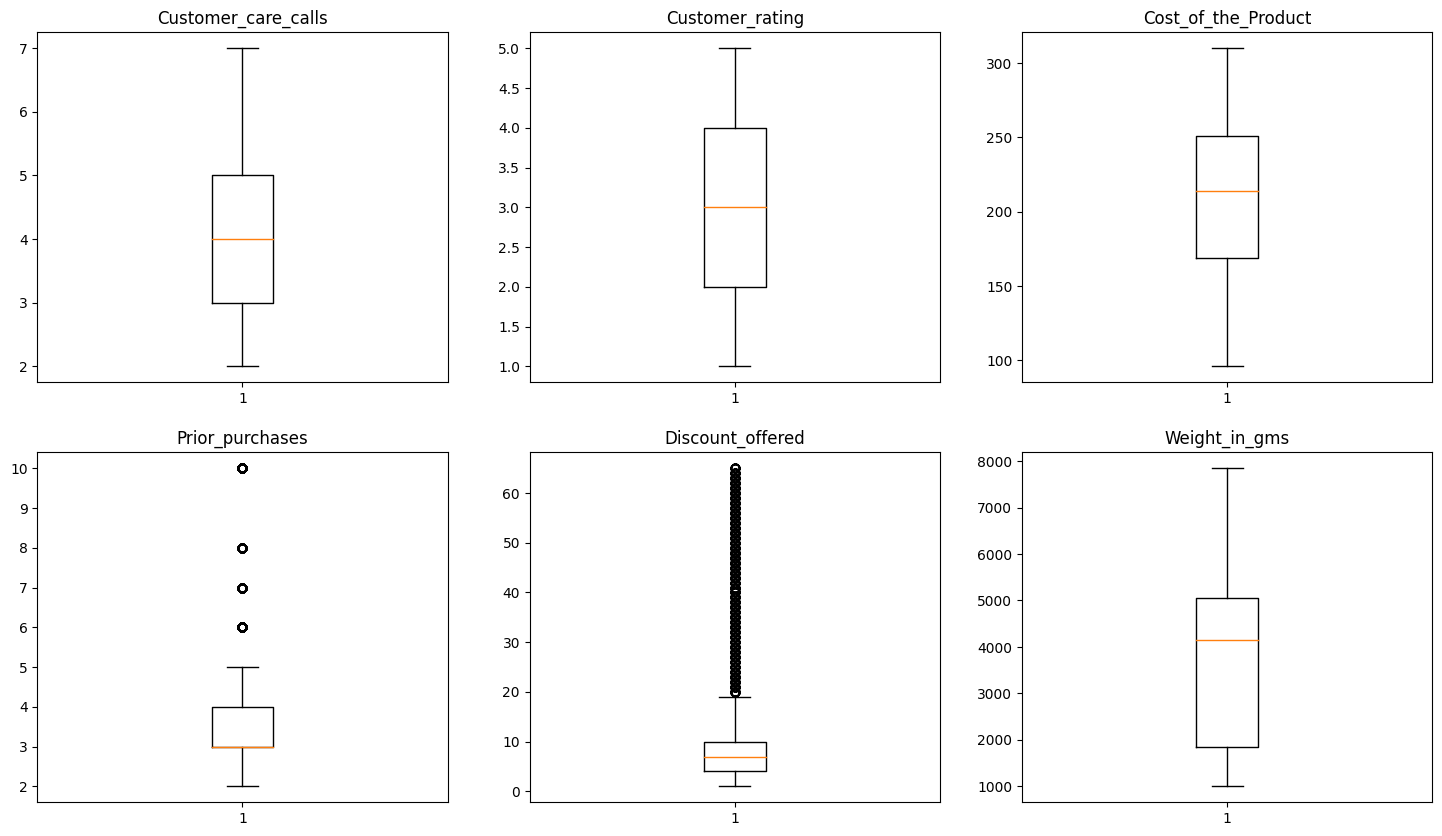

In [7]:
c=0
plt.figure(figsize=(18, 10))

for i in data.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N','ID']).columns:
    if str(data[i].dtype)== 'object':
        continue
    plt.subplot(2, 3, c+1)
    plt.boxplot(data[i])
    plt.title(i)
    c+=1
    
plt.show()

In [8]:
def check_outliers(arr):
    Q1 = np.percentile(arr,25,interpolation='midpoint') 
    Q3 = np.percentile(arr,75,interpolation='midpoint')
    IQR = Q3 - Q1

    #above upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(arr>=upper)
    print(' '*3, len(upper_array[upper_array == True]), 'are over the upper bound:',upper)

    #BeLow Lower bound

    lower = Q1-1.5*IQR
    lower_array=np.array(arr<=lower)
    print(' '*3, len(lower_array[lower_array == True]), 'are less than the lower bound:', lower, "\n")

for i in data.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N','ID']).columns:

    if str(data[i].dtype)== 'object':
        continue
    print (i)
    check_outliers(data[i])

Customer_care_calls
    0 are over the upper bound: 8.0
    0 are less than the lower bound: 0.0 

Customer_rating
    0 are over the upper bound: 7.0
    0 are less than the lower bound: -1.0 

Cost_of_the_Product
    0 are over the upper bound: 374.0
    0 are less than the lower bound: 46.0 

Prior_purchases
    1003 are over the upper bound: 5.5
    0 are less than the lower bound: 1.5 

Discount_offered
    2262 are over the upper bound: 19.0
    0 are less than the lower bound: -5.0 

Weight_in_gms
    0 are over the upper bound: 9865.75
    0 are less than the lower bound: -2976.25 



C:\Users\Varun\AppData\Local\Temp\ipykernel_13152\385444261.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(arr,25,interpolation='midpoint')
C:\Users\Varun\AppData\Local\Temp\ipykernel_13152\385444261.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(arr,75,interpolation='midpoint')


### ACTIVITY 3 : DATA SPLITTING

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
                                        data.drop(columns=['ID', 'Reached.on.Time_Y.N']), 
                                        data['Reached.on.Time_Y.N'], 
                                        random_state=1234, test_size = 0.20, 
                                        shuffle=True
                                        )

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 10)
(2200, 10)
(8799,)
(2200,)


### ACTIVITY 4 : NORMALIZATION

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [12]:
pkl.dump(scaler, open("scl.pkl", 'wb'))

# MILESTONE 3:- EXPLORATORY DATA ANALYSIS

### ACTIVITY 1 - DESCRIPTIVE STATISTICAL

In [13]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,1.833167,0.998454,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,3175.28214,1.343823,0.567099,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,1.000000,1.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,3.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


### VISUAL ANALYSIS

##### ACTIVITY 2.1 - UNIVARIATE ANALYSIS

In [14]:
import math

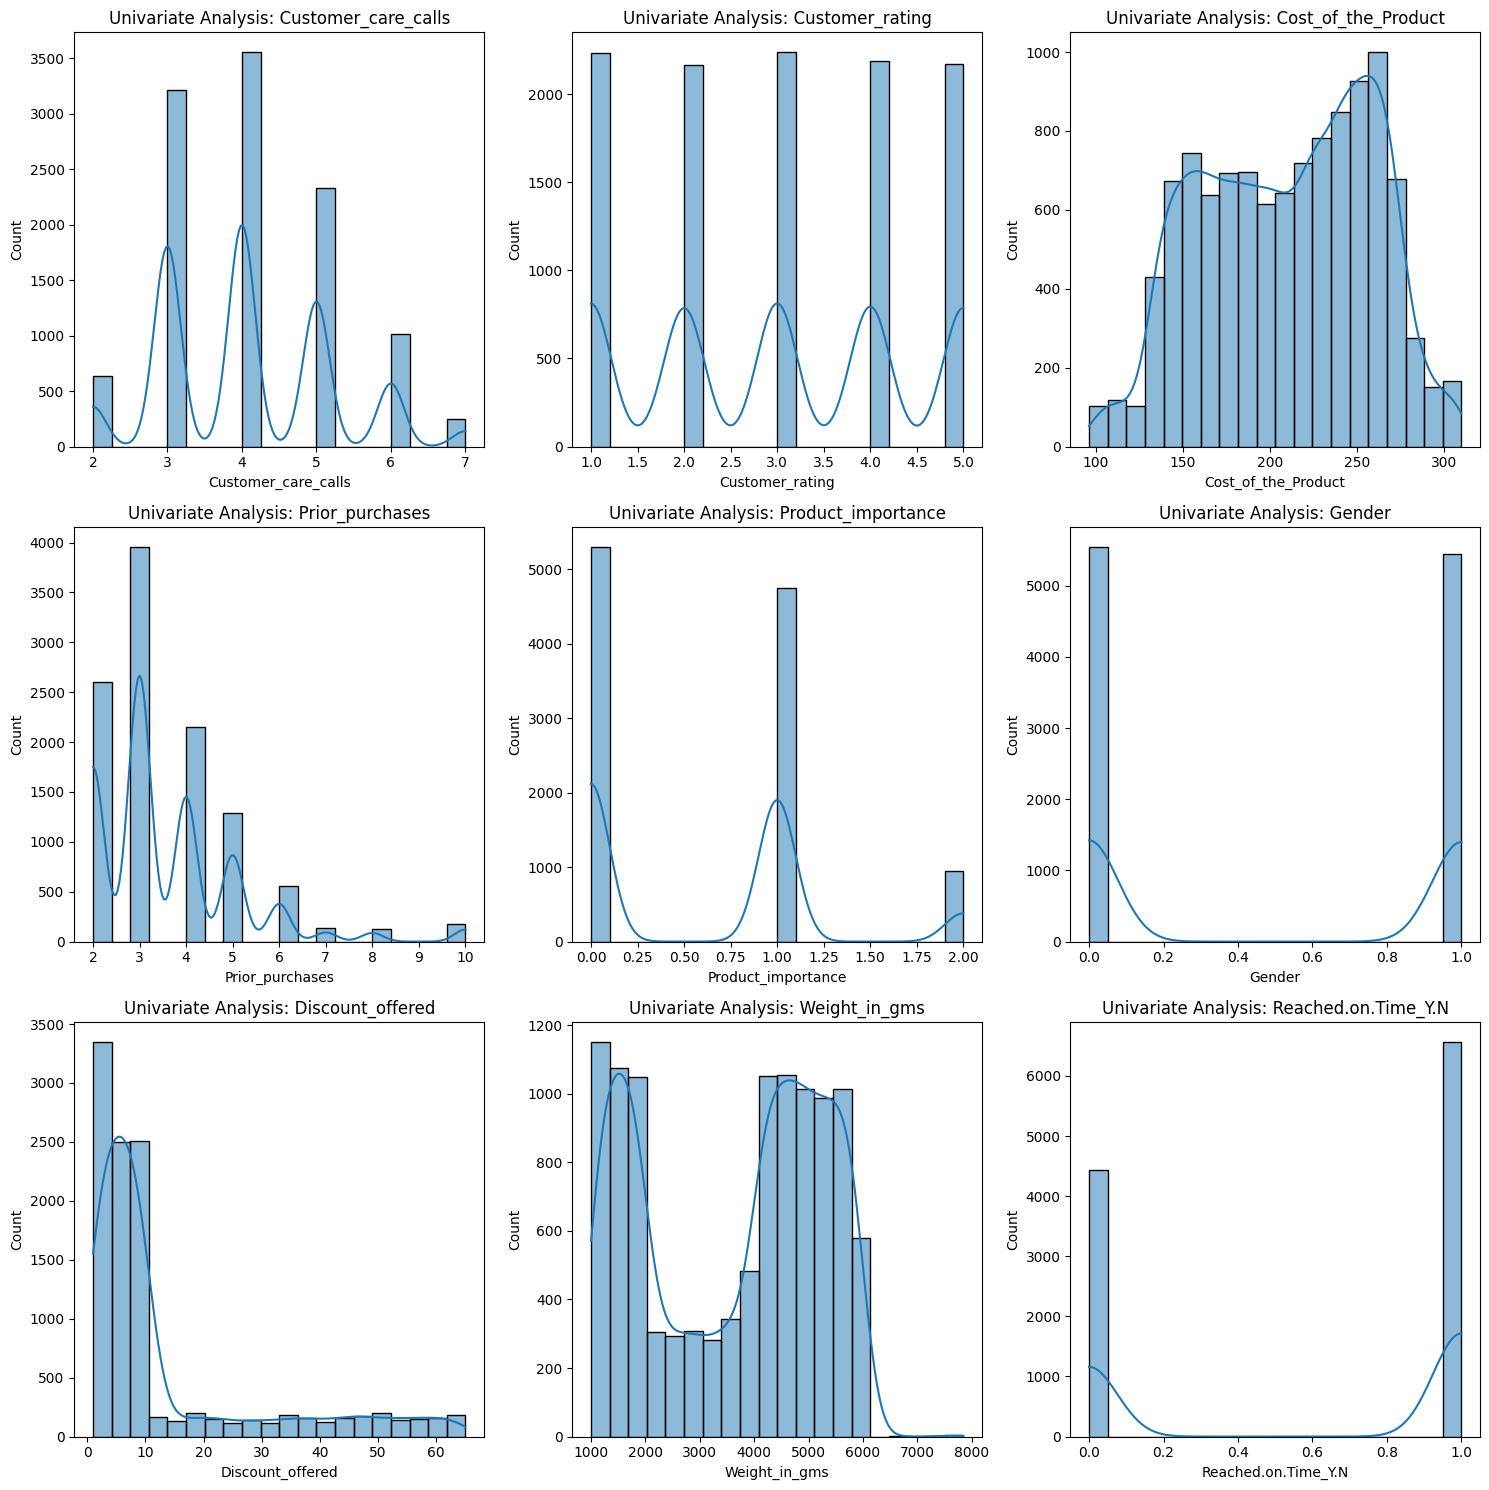

In [15]:
numerical_columns = data.select_dtypes(include=['number']).columns[3:]  # Exclude the first 3 columns
num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

# Iterate through each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust subplot layout based on the number of rows
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Univariate Analysis: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### ACTIVITY 2.2 - BIVARIATE ANALYSIS

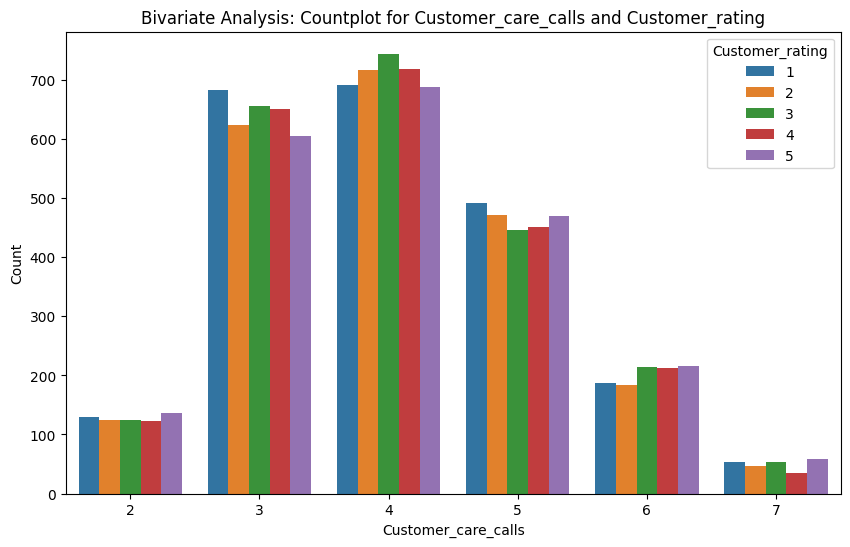

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_care_calls', hue='Customer_rating', data=data)
plt.title('Bivariate Analysis: Countplot for Customer_care_calls and Customer_rating')
plt.xlabel('Customer_care_calls')
plt.ylabel('Count')
plt.legend(title='Customer_rating')
plt.show()

##### ACTIVITY 2.3 - MULTIVARIATE ANALYSIS

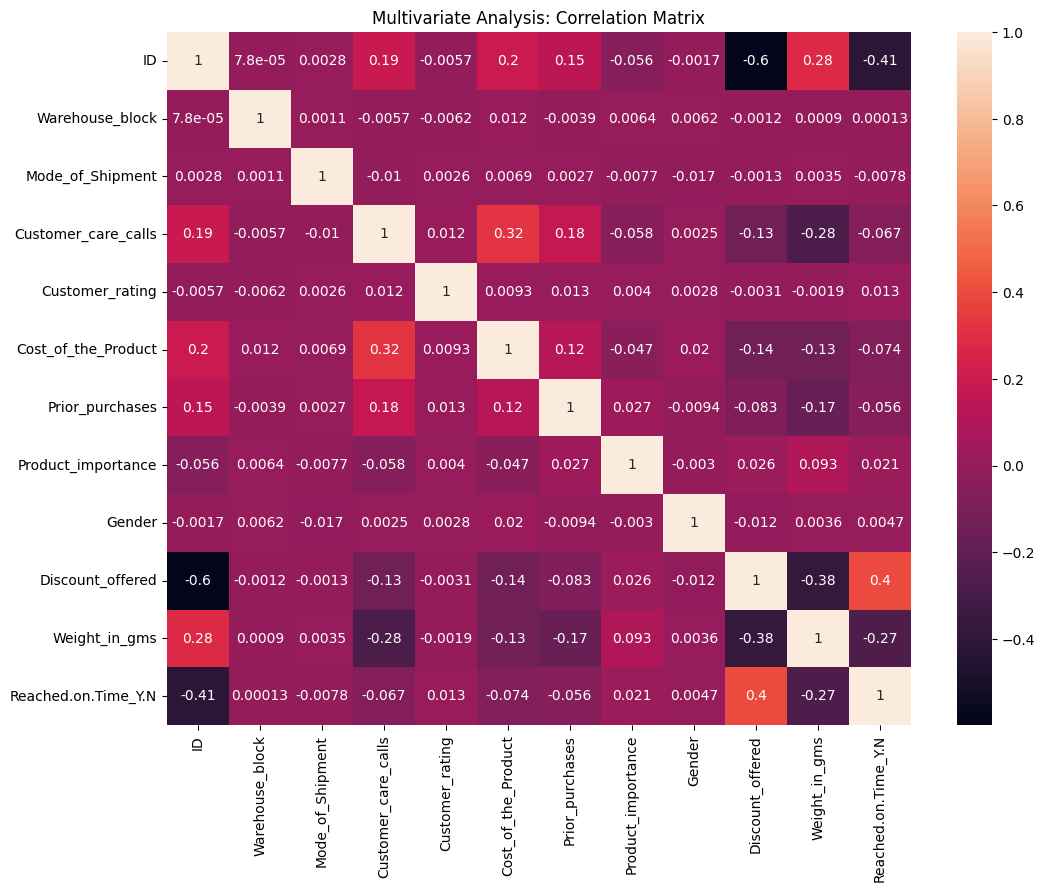

In [17]:
# Multivariate analysis using heatmap for correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix,annot=True)#, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Matrix')
plt.show()

# MILESTONE 4:- MODEL BUILDING

### ACTIVITY 1: TRAINING THE MODEL IN MULTIPLE ALGORITHMS

##### ACTIVITY 1.1 - CREATING FUNCTION TO TRAIN THE MODELS

In [18]:
def models_eval_mm(x_train,y_train,x_test,y_test):
    lg= LogisticRegression(random_state=1234)
    lg.fit(x_train,y_train)

    print('--Logistic Regression')
    print('Train Score:',lg.score(x_train,y_train)) 
    print('Test Score:',lg.score(x_test,y_test))
    print()

    lcv=LogisticRegressionCV(random_state=1234)
    lcv.fit(x_train,y_train)
    print('--Logistic Regression CV')
    print('Train Score:', lcv.score(x_train,y_train)) 
    print('Test Score:', lcv.score(x_test,y_test))
    print()

    print('--XGBoost')
    xgb=XGBClassifier(random_state=1234)
    xgb.fit(x_train,y_train) 
    print('Train Score:',xgb.score(x_train,y_train)) 
    print('Test Score:',xgb.score(x_test,y_test))
    print()

    print('--Ridge Classifier')
    rg=RidgeClassifier(random_state=1234)
    rg.fit(x_train,y_train)
    print('Train Score:',rg.score(x_train,y_train))
    print('Test Scores',rg.score(x_test,y_test))
    print()

    print('-KNN')
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    print('Train Score:',knn.score(x_train,y_train)) 
    print('Test Score:',knn.score(x_test,y_test))
    print()

    print('Random Forest')
    rf=RandomForestClassifier(random_state=1234) 
    rf.fit(x_train,y_train) 
    print('Train Score:',rf.score(x_train,y_train)) 
    print('Test Score:',rf.score(x_test,y_test))
    print()

    print('--SM classifier')
    svc=svm.SVC(random_state=1234)
    svc.fit(x_train,y_train)
    print('Train Score:',svc.score(x_train,y_train)) 
    print('Test Score:', svc.score(x_test,y_test))
    print()

    return lg,lcv,xgb,rg,knn,rf,svc

##### ACTIVITY 1.2 -  CALLING THE FUNCTION

In [19]:
lg,lcv,xgb,rg,knn,rf,svc=models_eval_mm(x_train_normalized,y_train,x_test_normalized,y_test)

--Logistic Regression
Train Score: 0.6416638254347085
Test Score: 0.639090909090909

--Logistic Regression CV
Train Score: 0.6417774747130356
Test Score: 0.639090909090909

--XGBoost
Train Score: 0.9060120468235027
Test Score: 0.64

--Ridge Classifier
Train Score: 0.650642118422548
Test Scores 0.6522727272727272

-KNN
Train Score: 0.7789521536538243
Test Score: 0.635

Random Forest
Train Score: 1.0
Test Score: 0.6568181818181819

--SM classifier
Train Score: 0.6903057165586999
Test Score: 0.6586363636363637



### ACTIVITY 2: TESTING THE MODELS

In [20]:
lg.predict(scaler.transform(np.array([0, 0, 4, 2, 177, 3, 0, 0, 44, 1233]).reshape(1,-1)))

d:\program files\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
lcv.predict(scaler.transform(np.array([0, 0, 4, 2, 177, 3, 0, 0, 44, 1233]).reshape(1,-1)))

d:\program files\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
xgb.predict(x_test_normalized[0].reshape(1,-1))

array([1])

In [23]:
rg.predict(x_test_normalized[0].reshape(1,-1))

array([1], dtype=int64)

In [24]:
knn.predict(x_test_normalized[0].reshape(1,-1))

array([0], dtype=int64)

In [25]:
rf.predict(scaler.transform(np.array([0, 0, 4, 2, 177, 3, 0, 0, 44, 1233]).reshape(1,-1)))

d:\program files\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [26]:
svc.predict(x_test_normalized[0].reshape(1,-1))

array([1], dtype=int64)

# MILESTONE 5:- PERFORMANCE TESTING AND HYPERPARAMETER TUNING

### ACTIVITY 1: TESTING THE MODEL WITH MULTIPLE EVALUATION METRICS

##### ACTIVITY 1.1: COMPARE THE MODELS

In [27]:
def eval(name,model):
    y_pred = model.predict(x_test_normalized)
    result = []
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100)) 
    result.append("{:.2f}".format(f1_score(y_test, y_pred)*100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred)*100)) 
    result.append("{:.2f}".format(precision_score(y_test, y_pred)*100))
    return result



In [28]:
model_list = {
    'logistic regression':lg,
    'logistic regression CV':lcv,
    'XGBoost':xgb,
    'Ridge classifier':rg,
    'KNN': knn,
    'Random Forest':rf,
    'Support Vector Classifier': svc
}

model_eval_info = []

for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))

model_eval_info = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'f1_score', 'Recall', 'Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,f1_score,Recall,Precision
0,logistic regression,63.91,69.06,67.94,70.21
1,logistic regression CV,63.91,69.22,68.48,69.98
2,XGBoost,64.00,68.55,66.18,71.09
3,Ridge classifier,65.23,70.47,70.02,70.94
4,KNN,63.50,68.50,66.95,70.12
5,Random Forest,65.68,68.69,63.50,74.80
6,Support Vector Classifier,65.86,67.08,58.67,78.30


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

for i in model_list.keys():
    y_pred = model_list[i].predict(x_test_normalized)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n******{i}*******")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")


******logistic regression*******
MAE: 0.3609090909090909
MSE: 0.3609090909090909
RMSE: 0.6007570980929737
R2 Score: -0.49505641980718695

******logistic regression CV*******
MAE: 0.3609090909090909
MSE: 0.3609090909090909
RMSE: 0.6007570980929737
R2 Score: -0.49505641980718695

******XGBoost*******
MAE: 0.36
MSE: 0.36
RMSE: 0.6
R2 Score: -0.4912905346187557

******Ridge classifier*******
MAE: 0.3477272727272727
MSE: 0.3477272727272727
RMSE: 0.5896840448301723
R2 Score: -0.44045108457493454

******KNN*******
MAE: 0.365
MSE: 0.365
RMSE: 0.6041522986797286
R2 Score: -0.5120029031551272

******Random Forest*******
MAE: 0.3431818181818182
MSE: 0.3431818181818182
RMSE: 0.5858172225035879
R2 Score: -0.42162165863277856

******Support Vector Classifier*******
MAE: 0.34136363636363637
MSE: 0.34136363636363637
RMSE: 0.5842633279298268
R2 Score: -0.4140898882559161


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your actual and predicted classification labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

In [31]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.76      0.65       896
           1       0.78      0.59      0.67      1304

    accuracy                           0.66      2200
   macro avg       0.67      0.68      0.66      2200
weighted avg       0.69      0.66      0.66      2200



### ACTIVITY 2-COMPARING MODEL ACCURACY AFTER HYPERPARAMETER TUNING

In [32]:
xgb.get_params() ##

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [33]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [34]:
lcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

##### HYPERPARAMETER OPTIMISATION FOR SVM

In [36]:
svc = svm.SVC(random_state=1234)

params = {
    'kernel': ['poly', 'rbf'], 
    'C': [ 10, 13], 
    'gamma': [4,5], 
    'tol':[1e-1,1e-2,1e-3] }

fitmodel = GridSearchCV(svc, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3) 
fitmodel.fit(x_train_normalized, y_train) 
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

# SVC(C=10, gamma-1, random_state=1234) ('C':10, 'gamma':1, 'kernel':'rbf') 0.6657575326890279
# SVC(C=6, gamma-2, random_state=1234) {'C':6, 'gamma':2, 'kernel': 'rbf') 0.6659845470050132

Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVC(C=13, gamma=5, kernel='poly', random_state=1234, tol=0.01) {'C': 13, 'gamma': 5, 'kernel': 'poly', 'tol': 0.01} 0.6572318336864955


##### HYPERPARAMETER OPTIMISATION FOR XGBOOST

In [37]:
params = {
    'min_child_weight': [10,20], 
    'gamma': [1.5, 2.0, 2.5], 
    'colsample_bytree': [0.6, 0.8, 0.9], 
    'max_depth': [4,5,6] } 

xgb= XGBClassifier(learning_rate=0.5, n_estimators=100, objective='binary:logistic', nthread=3) 
fitmodel = GridSearchCV(xgb, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=2, verbose=3) 
fitmodel.fit(x_train_normalized, y_train)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

# {'colsample_bytree': 0.8, 'gamma: 2.0, 'max_depth': 4, 'min_child_weight: 10) 0.6688713628611298

Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=3,
              num_parallel_tree=None, ...) {'colsample_bytree': 0.8, 'gamma': 2.5, 'max_depth': 4, 'min_child_weight': 10} 0.6817814874153704


##### HYPERPARAMETER OPTIMISATION FOR LOGISTIC REGRESSION

In [38]:
# Plug in appropriate max_depth and random_state parameters

lg= LogisticRegressionCV(n_jobs=-1, random_state= 1234)

lg_param_grid = {
    'Cs': [6,8,10,15,20],
    'max_iter': [60,80,100]}

lg_cv= GridSearchCV(lg,lg_param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=3)
lg_cv.fit(x_train_normalized,y_train)
print("Best Score: " + str(lg_cv.best_score_))
print("Best Parameters:" + str(lg_cv.best_params_))

# Best Score: 0.633821644529433
# Best Parameters: {'Cs': 10, 'max_iter': 60}

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Score: 0.6430276758488811
Best Parameters:{'Cs': 10, 'max_iter': 60}


##### HYPERPARAMETER OPTIMISATION FOR RANDOM FOREST

In [39]:
# Plug in appropriate max_depth and random_state parameters

rf=RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [200,300,500], 
    'criterion': ['entropy', 'gini'], 
    'max_depth': [7,8,60,80,100], 
    'max_features': ['auto', 'sqrt', 'log2']}

rf_cv= GridSearchCV(rf, rf_param_grid, cv=7, scoring="accuracy", n_jobs=-1, verbose=3) 
rf_cv.fit(x_train_normalized,y_train)
print("Best Score: " + str(rf_cv.best_score_)) 
print("Best Parameters: " + str(rf_cv.best_params_))

#Best Score: 0.6849642004773271
#Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max features': 'auto', 'n_estimators: 200)

Fitting 7 folds for each of 90 candidates, totalling 630 fits
Best Score: 0.6839413569723831
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}


In [40]:
rf_cv.predict(scaler.transform(np.array([0, 0, 4, 2, 177, 3, 0, 0, 44, 1233]).reshape(1,-1)))

d:\program files\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# MILESTONE 6:- MODEL DEPLOYMENT

### ACTIVITY 1-SAVE THE BEST MODEL

In [ ]:
import pickle 
from flask import Flask,request,render_template

In [ ]:
pickle.dump(rf_cv,open('rf_acc_68.pkl','wb'))

In [ ]:
import joblib 
joblib.dump(scaler, 'scl_model.pkl')

### ACTIVITY 2: INTEGRATE WITH WEB FRAMEWORK

##### ACTIVITY 2.1 - BUILDING THE HTML PAGES

##### ACTIVITY 2.2 - BUILD THE PYTHON CODE

In [ ]:
app=Flask(__name__)
model=pickle.dump(rf,open("rf_acc_68.pkl","wb"))
# Data_normalizer=pkl.dump(open("normalizer.pkl","wb"))

In [ ]:
@app.route('/')
def indput():
    return render_template('index.html')

In [ ]:
@app.route('/predict', methods = ['GET', 'POST'])

def admin():

    Warehouse_block=eval (request.form["warehouse_block"])
    Mode_of_Shipment-eval (request.form["Mode_of_Shipment"]) 
    Customer_care_calls=eval (request.form[ "Customer_care_calls"])
    Customer_rating-eval (request.form["Customer_rating"])
    Cost_of_the_Product = eval (request.form["Cost_of_the_Product"]) 
    Prior_purchases = eval (request.form["Prior_purchases"])
    Product_importance = eval(request.form["Product_importance"]) 
    Gender = eval(request.form["Gender"])
    Discount_offered = eval(request.form["Discount offered"])
    weight_in_gms = eval(request.form[ "Weight_in_gms"])
    preds=[[Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender,Discount_offered,weight_in_gms]]
    xx = model.predict(Data_normalizer.transform(preds))
    prob = model.predict_proba(Data_normalizer.transform(preds))[0]
    n_reach = prob[0]
    reach = prob[1]
    print('There is a (0:.2f)% chance that your product will reach in time'.format (reach*100))
    print(xx)
    return render_template("index.html",p='There is a (0:.2f} % chance that your product will reach in time'.format(reach*100))


##### ACTIVITY 2.3 - RUN THE WEB APPLICATION

In [ ]:
if __name__=='__main__' :
    app.run(debug = False, port=4000)